In [10]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import glob
import warnings
from IPython.display import display

warnings.filterwarnings('ignore')
mpl.rcParams['savefig.dpi'] = 128
mpl.rcParams['figure.dpi'] = 128
# Plot size to 14" x 7"
mpl.rc('figure', figsize = (14, 7))
# Font size to 14
mpl.rc('font', size = 14)
# Do not display top and right frame lines
mpl.rc('axes.spines', top = False, right = False)
# Remove grid lines
mpl.rc('axes', grid = False)
# Set backgound color to white
mpl.rc('axes', facecolor = 'white')

In [11]:
df = pd.read_csv("2007-2017.csv")
df.shape

(341170, 9)

In [12]:
from sklearn.utils import resample

df_majority = df[df['enquiry status'] == 'Rejected']
df_minority = df[df['enquiry status'] == 'Accepted']


# Upsample minority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,     # sample with replacement
                                 n_samples=84136,    # to match majority class
                                 random_state=123) # reproducible results



# Combine majority class with upsampled minority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

# Display new class counts
df_downsampled['enquiry status'].value_counts()

Accepted    84136
Rejected    84136
Name: enquiry status, dtype: int64

In [13]:
# # Separate majority and minority classes
# df_majority = df[df['enquiry status'] == 'Rejected']
# df_minority = df[df['enquiry status'] == 'Accepted']
 
# # Upsample minority class
# df_minority_upsampled = resample(df_minority, 
#                                  replace=True,     # sample with replacement
#                                  n_samples=218370,    # to match majority class
#                                  random_state=123) # reproducible results
 
# # Combine majority class with upsampled minority class
# df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# # Display new class counts
# df_upsampled['enquiry status'].value_counts()

In [14]:
df = df_downsampled

In [15]:
target = 'enquiry status';

X = df[df.keys()]
X = df.loc[:,df.columns != target]
y = df[target]

In [16]:
category_column = X.select_dtypes(include='object')

In [17]:
# X = pd.get_dummies(X)

In [18]:
from sklearn import preprocessing

transform_dict = {}
for col in category_column.columns:
    le = preprocessing.LabelEncoder()
    X[col] = le.fit_transform(X[col])
    transform_dict[col] = dict(zip(le.classes_, le.transform(le.classes_)))
    

le = preprocessing.LabelEncoder()
y = le.fit_transform(y)

In [19]:
from sklearn.preprocessing import StandardScaler

feat_labels = X.columns[0:]
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [20]:
# from sklearn.model_selection import GridSearchCV
# from sklearn import linear_model
# from sklearn.ensemble import RandomForestClassifier

# # Create logistic regression
# randomForest = RandomForestClassifier()

# # Create range of candidate penalty hyperparameter values
# n_estimators = [100, 500, 1000]
# max_features = [3, 5, 8]

# # Create dictionary hyperparameter candidates
# hyperparameters = dict(n_estimators=n_estimators, max_features=max_features)

# # Create grid search
# gridsearch = GridSearchCV(randomForest, hyperparameters, cv=5, verbose=0 , n_jobs=-1)

# # Fit grid search
# best_model = gridsearch.fit(X, y)

In [21]:
# # View best hyperparameters
# print('Best n_estimators:', best_model.best_estimator_.get_params()['n_estimators'])
# print('Best max_features:', best_model.best_estimator_.get_params()['max_features'])

In [22]:
from sklearn.model_selection import train_test_split

# split data and labels into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y,
                     test_size=0.4,
                     random_state=0,
                     stratify=y)

In [23]:
from sklearn.ensemble import RandomForestClassifier

randomForest = RandomForestClassifier(n_estimators=500, n_jobs=-1)
randomForest.fit(X_train, y_train)
rf_label = randomForest.predict(X_test)
print('Test Accuracy: %.3f' % randomForest.score(X_test, y_test))

Test Accuracy: 0.738


In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn import cross_validation

scores = cross_validation.cross_val_score(randomForest, X, y, cv=5)
print("Random forest cross_validation: {:.2f}".format(np.mean(scores, axis=0)))

print("Random forest")
print(classification_report(y_test, rf_label))

Random forest cross_validation: 0.66
Random forest
             precision    recall  f1-score   support

          0       0.71      0.80      0.75     33655
          1       0.77      0.68      0.72     33654

avg / total       0.74      0.74      0.74     67309



In [ ]:
prob_y_2 = randomForest.predict_proba(X)
prob_y_2 = [p[1] for p in prob_y_2]
print( roc_auc_score(y, prob_y_2) )

0.965068212172


In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator=randomForest,
                                                        X=X_train,y=y_train,train_sizes=np.linspace(0.1, 1.0, 10),
                                                        cv=10,n_jobs=-1,verbose=1)
train_mean = np.mean(train_scores,axis=1)
train_std = np.std(train_scores, axis=1)      
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)



[learning_curve] Training set sizes: [ 9086 18173 27259 36346 45432 54519 63605 72692 81778 90865]


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 22.4min finished


train_mean [ 0.99996698  0.99984593  0.99981657  0.99977164  0.99973147  0.99968451
  0.99966355  0.99961756  0.99950353  0.99946294]
train_std [  9.90534889e-05   5.39149231e-05   2.84161807e-05   1.76171360e-05
   1.32065504e-05   1.59903848e-05   1.44094826e-05   1.92593408e-05
   4.13596188e-05   3.10498783e-05]
train_mean [ 0.99996698  0.99984593  0.99981657  0.99977164  0.99973147  0.99968451
  0.99966355  0.99961756  0.99950353  0.99946294]
test_std [ 0.00433238  0.0048285   0.00357299  0.00383328  0.00461991  0.00500193
  0.00551059  0.0051981   0.00472199  0.00518072]


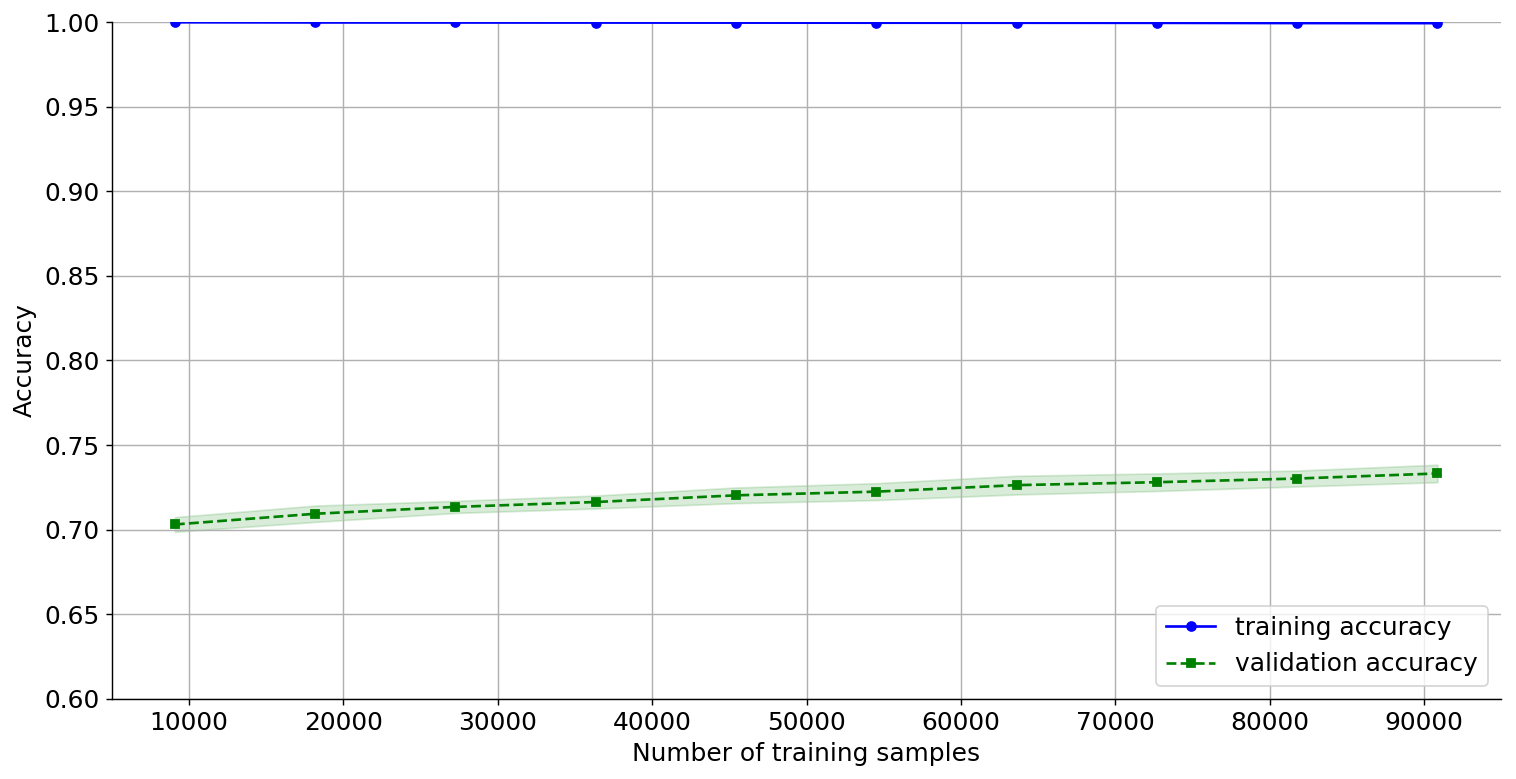

In [ ]:
print("train_mean",train_mean)
print("train_std",train_std)
print("train_mean",train_mean)
print("test_std",test_std)


plt.plot(train_sizes, train_mean,color='blue', marker='o',markersize=5,label='training accuracy')
plt.fill_between(train_sizes,train_mean + train_std,train_mean - train_std,alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean,color='green', linestyle='--',marker='s', markersize=5,label='validation accuracy')
plt.fill_between(train_sizes,test_mean + test_std,test_mean - test_std,alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')               
plt.legend(loc='lower right')
plt.ylim([0.6, 1.0])
plt.show()

In [ ]:
# # feat_labels = X.columns[0:]
# importances = randomForest.feature_importances_

# # reverse the list
# indices = np.argsort(importances)[::-1]

# for f in range(X_train.shape[1]):
#     print("%2d) %-*s %f" % (f + 1, 30,feat_labels[indices[f]],importances[indices[f]]))

In [ ]:
from sklearn.externals import joblib
encoder = joblib.load('app/models/encoder.pkl')

In [ ]:
import json
my_json_string = json.dumps({
#     'marketing_code':'P0001',
    "classification": "Direct",
    "enquired":"29/1/15 12:10",
    "loan amount": "1184000",
    "property_use": "Residence",
    "loan_reason": "Refinance"
})

In [ ]:
data = json.loads(my_json_string)
data = pd.DataFrame(data,index=[0])

In [ ]:
def transform_cols(df):
    df.columns = map(str.lower, df.columns)
    df.columns = df.columns.str.replace('_', ' ')
    return df

In [ ]:
transform_cols(data)

,classification,enquired,loan amount,loan reason,property use
0,Direct,29/1/15 12:10,1184000,Refinance,Residence


In [ ]:
data.dtypes

classification    object
enquired          object
loan amount       object
loan reason       object
property use      object
dtype: object

In [ ]:
def transform(df): 
    if 'loan amount' in df.columns: 
        df['loan amount'] = df['loan amount'].astype('float')
        
    if 'enquired' in df.columns: 
        df['enquired'] = pd.DatetimeIndex(df['enquired'])
        df['month'] = df['enquired'].dt.month
        df['day'] = df['enquired'].dt.day
        df['hour'] = df['enquired'].dt.hour
        df['weekday'] = df['enquired'].dt.dayofweek
    
    if 'post code' in df.columns: 
        df['post code'] = df['post code'].astype('int')
    
    if 'enquired'in df.columns:
        df.drop(['enquired'], axis = 1, inplace = True)

    return df.replace(encoder)

In [ ]:
data = transform(data)
data.dtypes

classification      int64
loan amount       float64
loan reason         int64
property use        int64
month               int64
day                 int64
hour                int64
weekday             int64
dtype: object

In [ ]:
# data = pd.get_dummies(data)

In [ ]:
randomForest.predict(data)

array([0])

In [ ]:
print("posibility is: {}".format(np.max(randomForest.predict_proba(data))))

posibility is: 0.622


In [ ]:
df = pd.read_csv("2007-2017_origin.csv")

In [ ]:
df['classification'].value_counts()

In [ ]:
test = df[df['enquiry status'] == 'Accepted']
# test = test[test['classification'] == 'Domain']
test = test.loc[:,test.columns != 'enquiry status']

In [ ]:
test = transform(test)

In [ ]:
# test

In [ ]:
prediction = randomForest.predict(test)

In [ ]:
proba = []
result = randomForest.predict_proba(test)
for row in range(len(result)):
    proba.append(np.max(result[row]))

In [ ]:
test["prediction"] = prediction
test["proba"] = proba

In [ ]:
test.sort_values(by=['proba'],ascending=False)

In [ ]:
test[test['proba'] < 0.56].count()

In [ ]:
test[test["prediction"] == 1].count()

In [ ]:
test[test["prediction"] == 0].count()

In [ ]:
X_train.shape